In [27]:
import numpy as np
import requests
from pyvo.dal import sia  #new! for what? Simple Image Access

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import EarthLocation, Angle
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS


import matplotlib.pyplot as plt
import numpy as np
import requests
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Polygon
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"
import pandas as pd


In [13]:
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/nsa"
svc_nsa = sia.SIAService(DEF_ACCESS_URL)

In [14]:
ra = 9.854641111
dec = -8.973971944
image_table_958013 = svc_nsa.search((ra, dec)).to_table()

In [15]:
image_table_958013

assoc_id,access_url,access_format,access_estsize,dataproduct_type,dataproduct_subtype,calib_level,dataset_length,im_nsubarrays,im_naxes,im_naxis,im_pixtype,im_wcsaxes,im_scale,obs_title,obs_id,obs_creator_name,obs_collection,obs_creation_type,obs_creation_date,facility_name,instrument_name,obs_bandpass,obs_datasource,proposal_id,obs_publisher_did,obs_release_date,preview,target_name,target_class,s_ra,s_dec,s_fov,s_region,s_calib_status,s_resolution,em_min,em_max,em_resolution,em_res_power,t_min,t_max,t_exptime,t_resolution,o_ucd,o_unit,pol_states,object,airmass,project_code,magzero,prodtype,seeing,fwhm,fileset_id,exptime,photflag,proctype,date_obs,mjd_obs,elliptic
,,,bytes,,,,,,,,,,deg,,,,,,,,,,,,,,,,,deg,deg,deg,deg,,arcsec,m,m,m,,d,d,s,s,,,,,,,,,,,,,,,,,
object,object,object,int32,object,object,int64,int64,int32,int32,object,object,object,object,object,object,object,object,object,object,str1,object,object,object,object,object,object,object,object,object,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
ct4m20141025t060506,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141025_061101_osw_i_v1.fits.fz&extn=6&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,167239,,,3,0,0,2,[24 9072],,,[0.27064],,ct4m20141025t060506,,2014B-0265,archival,,,DECam,i,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141025_061101_osw_i_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141025_061101_osw_i_v1.fits.fz&extn=6&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.70282,-9.3007,--,,,--,7100.0,8570.0,--,--,--,--,--,--,,,,Abell 85,1.42,2014B-0265,31.312,wtmap,0,4.20126,,1500,,Stack,2014-10-25T06:05:06.995164,556955.25355318,0
ct4m20141024t021754,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_022346_osi_r_v1.fits.fz&extn=6&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,399209,,,3,0,0,2,[24 9077],,,[0.27064],,ct4m20141024t021754,,2014B-0265,archival,,,DECam,r,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141024_022346_osi_r_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_022346_osi_r_v1.fits.fz&extn=6&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.69872,-9.30051,--,,,--,5675.0,7155.0,--,--,--,--,--,--,,,,Abell 85,1.1,2014B-0265,31.537,image,0,4.54505,,4800,,Stack,2014-10-24T02:17:54.882167,556954.0957741,0
ct4m20141024t033956,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_034905_osd_u_v1.fits.fz&extn=6&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,793,,,3,0,0,2,[8 9079],,,[0.27064],,ct4m20141024t033956,,2014B-0265,archival,,,DECam,u,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141024_034905_osd_u_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_034905_osd_u_v1.fits.fz&extn=6&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.70176,-9.30081,--,,,--,1000.0,1000.0,--,--,--,--,--,--,,,,Abell 85,1.08,2014B-0265,27.8265,dqmask,0,5.74779,,6500,,Stack,2014-10-24T03:39:56.743833,556954.15274009,0
ct4m20141024t033956,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_034905_osw_u_v1.fits.fz&extn=6&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,166950,,,3,0,0,2,[24 9079],,,[0.27064],,ct4m20141024t033956,,2014B-0265,archival,,,DECam,u,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141024_034905_osw_u_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_034905_osw_u_v1.fits.fz&extn=6&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.70176,-9.30081,--,,,--,1000.0,1000.0,--,--,--,--,--,--,,,,Abell 85,1.08,2014B-0265,27.8265,wtmap,0,5.74779,,6500,,Stack,2014-10-24T03:39:56.743833,556954.15274009,0
ct4m20141024t033956,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_034905_osi_u_v1.fits.f

In [16]:
image_table_958013.columns

<TableColumns names=('assoc_id','access_url','access_format','access_estsize','dataproduct_type','dataproduct_subtype','calib_level','dataset_length','im_nsubarrays','im_naxes','im_naxis','im_pixtype','im_wcsaxes','im_scale','obs_title','obs_id','obs_creator_name','obs_collection','obs_creation_type','obs_creation_date','facility_name','instrument_name','obs_bandpass','obs_datasource','proposal_id','obs_publisher_did','obs_release_date','preview','target_name','target_class','s_ra','s_dec','s_fov','s_region','s_calib_status','s_resolution','em_min','em_max','em_resolution','em_res_power','t_min','t_max','t_exptime','t_resolution','o_ucd','o_unit','pol_states','object','airmass','project_code','magzero','prodtype','seeing','fwhm','fileset_id','exptime','photflag','proctype','date_obs','mjd_obs','elliptic')>

In [17]:
instcal_filter = (image_table_958013['proctype'] == 'InstCal')
image_table_958013_instcals = image_table_958013[instcal_filter]

In [18]:
image_table_958013_instcals

assoc_id,access_url,access_format,access_estsize,dataproduct_type,dataproduct_subtype,calib_level,dataset_length,im_nsubarrays,im_naxes,im_naxis,im_pixtype,im_wcsaxes,im_scale,obs_title,obs_id,obs_creator_name,obs_collection,obs_creation_type,obs_creation_date,facility_name,instrument_name,obs_bandpass,obs_datasource,proposal_id,obs_publisher_did,obs_release_date,preview,target_name,target_class,s_ra,s_dec,s_fov,s_region,s_calib_status,s_resolution,em_min,em_max,em_resolution,em_res_power,t_min,t_max,t_exptime,t_resolution,o_ucd,o_unit,pol_states,object,airmass,project_code,magzero,prodtype,seeing,fwhm,fileset_id,exptime,photflag,proctype,date_obs,mjd_obs,elliptic
,,,bytes,,,,,,,,,,deg,,,,,,,,,,,,,,,,,deg,deg,deg,deg,,arcsec,m,m,m,,d,d,s,s,,,,,,,,,,,,,,,,,
object,object,object,int32,object,object,int64,int64,int32,int32,object,object,object,object,object,object,object,object,object,object,str1,object,object,object,object,object,object,object,object,object,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
ct4m20141024t032900,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_033450_oow_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,149459,,,2,0,0,2,[32 4094],,,[-0.13192],,ct4m20141024t032900,,2014B-0265,archival,,,DECam,r,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141024_033450_oow_r_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_033450_oow_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.71408,-9.0117,--,,,--,5675.0,7155.0,--,--,--,--,--,--,,,,Abell 85,1.07,2014B-0265,31.51,wtmap,0.573,0,,300,,InstCal,2014-10-24T03:29:00.571354,556954.1451455,0
ct4m20141024t032900,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_033450_ooi_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,309763,,,2,0,0,2,[24 4094],,,[-0.13192],,ct4m20141024t032900,,2014B-0265,archival,,,DECam,r,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141024_033450_ooi_r_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_033450_ooi_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.71408,-9.0117,--,,,--,5675.0,7155.0,--,--,--,--,--,--,,,,Abell 85,1.07,2014B-0265,31.51,image,0.573,0,,300,,InstCal,2014-10-24T03:29:00.571354,556954.1451455,0
ct4m20141024t032900,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_033450_ood_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,7922,,,2,0,0,2,[8 4094],,,[-0.13192],,ct4m20141024t032900,,2014B-0265,archival,,,DECam,r,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141024_033450_ood_r_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_033450_ood_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.71408,-9.0117,--,,,--,5675.0,7155.0,--,--,--,--,--,--,,,,Abell 85,1.07,2014B-0265,31.51,dqmask,0.573,0,,300,,InstCal,2014-10-24T03:29:00.571354,556954.1451455,0
ct4m20141025t062701,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141025_063253_ooi_i_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,309799,,,2,0,0,2,[24 4094],,,[-0.13195],,ct4m20141025t062701,,2014B-0265,archival,,,DECam,i,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141025_063253_ooi_i_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141025_063253_ooi_i_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.7166,-9.01143,--,,,--,7100.0,8570.0,--,--,--,--,--,--,,,,Abell 85,1.55,2014B-0265,30.939,image,0.779,0,,300,,InstCal,2014-10-25T06:27:01.719614,556955.2687699,0
ct4m20141025t062701,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141025_063253_ood_i_v1.fits.fz

In [19]:
instcal_filter = (image_table_958013['proctype'] == 'InstCal') & (image_table_958013['prodtype'] == 'image')
image_table_958013_instcals = image_table_958013[instcal_filter]

In [20]:
image_table_958013_instcals

assoc_id,access_url,access_format,access_estsize,dataproduct_type,dataproduct_subtype,calib_level,dataset_length,im_nsubarrays,im_naxes,im_naxis,im_pixtype,im_wcsaxes,im_scale,obs_title,obs_id,obs_creator_name,obs_collection,obs_creation_type,obs_creation_date,facility_name,instrument_name,obs_bandpass,obs_datasource,proposal_id,obs_publisher_did,obs_release_date,preview,target_name,target_class,s_ra,s_dec,s_fov,s_region,s_calib_status,s_resolution,em_min,em_max,em_resolution,em_res_power,t_min,t_max,t_exptime,t_resolution,o_ucd,o_unit,pol_states,object,airmass,project_code,magzero,prodtype,seeing,fwhm,fileset_id,exptime,photflag,proctype,date_obs,mjd_obs,elliptic
,,,bytes,,,,,,,,,,deg,,,,,,,,,,,,,,,,,deg,deg,deg,deg,,arcsec,m,m,m,,d,d,s,s,,,,,,,,,,,,,,,,,
object,object,object,int32,object,object,int64,int64,int32,int32,object,object,object,object,object,object,object,object,object,object,str1,object,object,object,object,object,object,object,object,object,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
ct4m20141024t032900,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_033450_ooi_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,309763,,,2,0,0,2,[24 4094],,,[-0.13192],,ct4m20141024t032900,,2014B-0265,archival,,,DECam,r,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141024_033450_ooi_r_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_033450_ooi_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.71408,-9.0117,--,,,--,5675.0,7155.0,--,--,--,--,--,--,,,,Abell 85,1.07,2014B-0265,31.51,image,0.573,0,,300,,InstCal,2014-10-24T03:29:00.571354,556954.1451455,0
ct4m20141025t062701,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141025_063253_ooi_i_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,309799,,,2,0,0,2,[24 4094],,,[-0.13195],,ct4m20141025t062701,,2014B-0265,archival,,,DECam,i,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141025_063253_ooi_i_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141025_063253_ooi_i_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.7166,-9.01143,--,,,--,7100.0,8570.0,--,--,--,--,--,--,,,,Abell 85,1.55,2014B-0265,30.939,image,0.779,0,,300,,InstCal,2014-10-25T06:27:01.719614,556955.2687699,0
ct4m20130831t041105,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_130831_041105_ooi_z_v1.fits.fz&extn=39&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,315804,,,2,0,0,2,[24 4094],,,[-0.13239],,ct4m20130831t041105,,2013B-0502,archival,,,DECam,z,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_130831_041105_ooi_z_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_130831_041105_ooi_z_v1.fits.fz&extn=39&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.70652,-8.9838,--,,,--,8500.0,10020.0,--,--,--,--,--,--,,,,Abell 85,1.36,2013B-0502,29.803,image,1.287,0,,240,,InstCal,2013-08-31T04:11:05.302634,556535.17436693,0
ct4m20141024t030142,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_030735_ooi_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0",image/fits,309796,,,2,0,0,2,[24 4094],,,[-0.13193],,ct4m20141024t030142,,2014B-0265,archival,,,DECam,r,,,ivo://datalab.noirlab/vo#ivoa_nsa.siav1:ivo://datalab.noao//c4d_141024_030735_ooi_r_v1.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_030735_ooi_r_v1.fits.fz&extn=18&POS=9.854641111,-8.973971944&SIZE=1.0,1.0&preview=true",,,9.71453,-9.01174,--,,,--,5675.0,7155.0,--,--,--,--,--,--,,,,Abell 85,1.07,2014B-0265,31.545,image,0.543,0,,300,,InstCal,2014-10-24T03:01:42.138531,556954.12618216,0
ct4m20141024t040623,"https://datalab.noirlab.edu/svc/cutout?col=&siaRef=c4d_141024_041530_ooi_u_v1

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


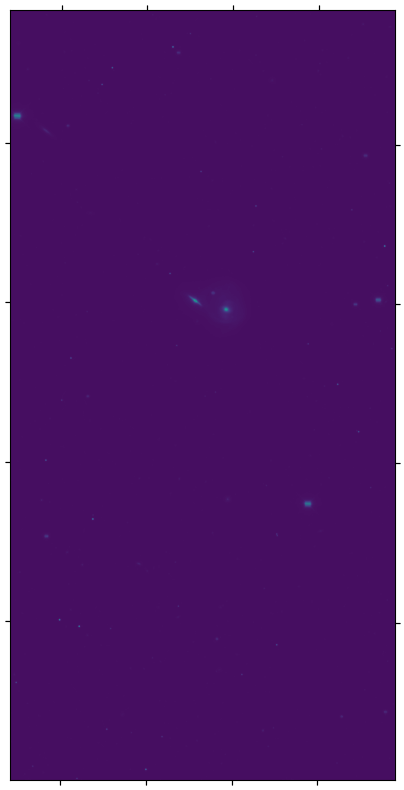

In [28]:
from astropy.io import fits
from astropy.utils.data import download_file

row = image_table_958013_instcals[0]
url = row['access_url']#.decode()
filename = download_file(url, cache=True, show_progress=False)
hdu = fits.open(filename)[0]
image = hdu.data
hdr = hdu.header
wcs = WCS(hdr)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection=wcs)
ax.imshow(image, origin='lower')